In [4]:
import pandas as pd
import numpy as np

books=pd.read_csv("book.csv",encoding='ISO-8859-1')
books.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [15]:
books=books.rename(columns={"User.ID":"user_id","Book.Title":"book_title","Book.Rating":"book_rating"})

In [16]:
books

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [17]:
books_df=books[["user_id","book_title","book_rating"]]

In [18]:
books_df.head()

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [31]:
books_df.shape

(10000, 3)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


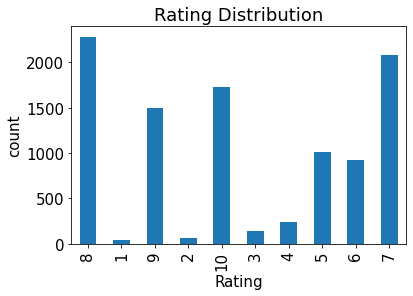

In [30]:
plt.rc("font",size=15)
books_df.book_rating.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('count')
plt.title("Rating Distribution")
plt.show()

In [28]:
#display the information with rating >=200
counts1=books_df["user_id"].value_counts()
ratings=books_df[books_df["user_id"].isin(counts1[counts1 >=200].index)]
ratings

,user_id,book_title,book_rating
5137,2276,Shock,10
5138,2276,One of ours,9
5139,2276,The Clan of the Cave Bear (Earth's Children (P...,8
5140,2276,Sapphira and the Slave Girl,8
5141,2276,The Awakening,9
...,...,...,...
9964,162052,Ali and Nino: A Love Story,5
9965,162052,Objects in Mirror Are Closer Than They Appear ...,7
9966,162052,Ragtime,9
9967,162052,The Man Who Ate the 747,10


In [29]:
#display the information with rating >=100
counts2=books_df["user_id"].value_counts()
ratings=books_df[books_df["user_id"].isin(counts2[counts2 >=100].index)]
ratings

,user_id,book_title,book_rating
672,277427,Dark Lady,10
673,277427,The Future Scrolls,8
674,277427,About Face,10
675,277427,Tarot Says Beware (A Herculeah Jones Mystery),7
676,277427,Globalhead,9
...,...,...,...
9964,162052,Ali and Nino: A Love Story,5
9965,162052,Objects in Mirror Are Closer Than They Appear ...,7
9966,162052,Ragtime,9
9967,162052,The Man Who Ate the 747,10


# COLLABORATIVE FILTERING USING KNN

In [ ]:
#creating a new data set that contains total rating counts and book title

In [52]:

book_ratingCount = (books_df.
     groupby(by = ['book_title'])['book_rating'].
     count().
     reset_index().
     rename(columns = {'book_rating': 'totalRatingCount'})
     [['book_title', 'totalRatingCount']]
    )
book_ratingCount.head()

,book_title,totalRatingCount
0,"Jason, Madison &amp",1
1,Other Stories;Merril;1985;McClelland &amp,1
2,Repairing PC Drives &amp,1
3,'48,1
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1


In [53]:
#merge the book_rating _count with books_df
new_books_df=books_df.merge(book_rating_counts,left_on='book_title',right_on="book_title",how='left')
new_books_df.head()

,user_id,book_title,book_rating,totalratingcount
0,276726,Classical Mythology,5,1
1,276729,Clara Callan,3,1
2,276729,Decision in Normandy,6,1
3,276736,Flu: The Story of the Great Influenza Pandemic...,8,1
4,276737,The Mummies of Urumchi,6,1


In [57]:
#consider threshold value>5 rating count for further processing

popular_rated_books=new_books_df.query("totalratingcount>=2")
popular_rated_books

,user_id,book_title,book_rating,totalratingcount
5,276744,The Kitchen God's Wife,7,2
18,276762,The Testament,8,3
27,276780,Airframe,7,2
36,276798,Lying Awake,5,2
37,276798,To Kill a Mockingbird,7,2
...,...,...,...,...
9945,162052,Rose,8,2
9948,162052,Leaving Home,1,2
9952,162052,Dave Barry in Cyberspace,8,2
9961,162052,Tomcat in Love,6,2


In [65]:
#apply knn algorithm using cosine similarity
#before applying the algorithm convert data set into  matrix format

#craete pivottable
popular_rated_books=popular_rated_books.drop_duplicates(["user_id","book_title"])
books_matrix=popular_rated_books.pivot_table(index='book_title',columns="user_id",values="book_rating").fillna(0)

In [66]:
books_matrix

user_id,19,51,53,82,83,85,86,160,183,190,...,278636,278637,278648,278668,278675,278694,278715,278843,278844,278851
book_title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2061: Odyssey Three,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Density of Souls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World of Pies : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wouldn't Take Nothing for My Journey Now,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
#convert data into sparse matrix format
from scipy.sparse import csr_matrix
book_features = csr_matrix(books_matrix.values)



In [87]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(book_features)

NearestNeighbors(algorithm='brute', metric='cosine')

In [88]:
query_index=np.random.choice(books_matrix.shape[0])
print(query_index)

267


In [89]:
distances,indices=model.kneighbors(books_matrix.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [90]:
books_matrix.index[query_index]

'The Tortilla Curtain'

In [91]:
#create a recommendation of Rutland Place
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(books_matrix.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, books_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Tortilla Curtain:

1: The Firm, with distance of 0.6048160918449983:
2: Alice's Tulips, with distance of 0.6890989716521091:
3: The Brimstone Wedding, with distance of 1.0:
4: The Castle in the Attic, with distance of 1.0:
5: The Cat Who Tailed a Thief, with distance of 1.0:
